In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('titanic - titanic.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 12)

## 1. Identify & handle missing value

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.Check for duplicates and handle it.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

## 3. Identify outliers & handle it.

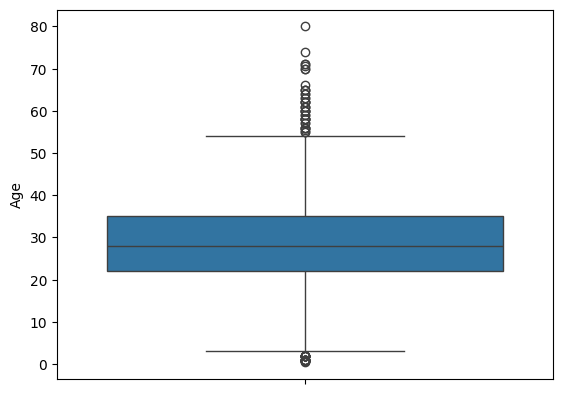

In [ ]:
sns.boxplot(df['Age'])
plt.show()

In [ ]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])

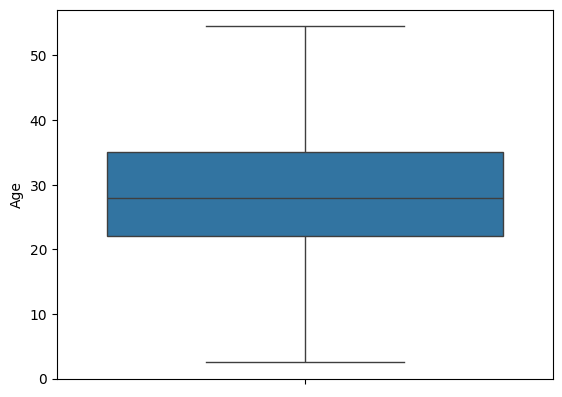

In [ ]:
sns.boxplot(df['Age'])
plt.show()

## 4. Apply data encoding technique on suitable attribute.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Pclass'] = le.fit_transform(df['Pclass'])

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,2,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


## 5.Apply Univariate, Bivariate & Multivariate analysis·

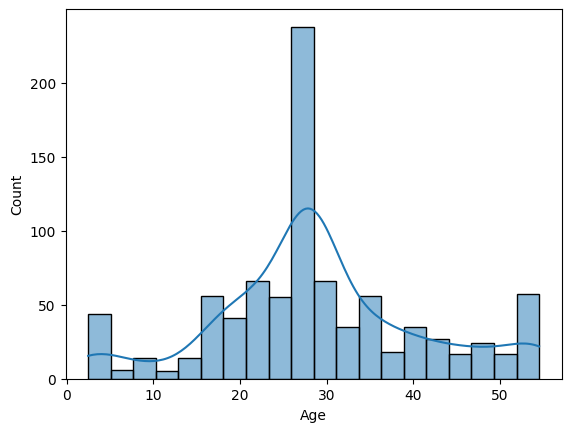

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()

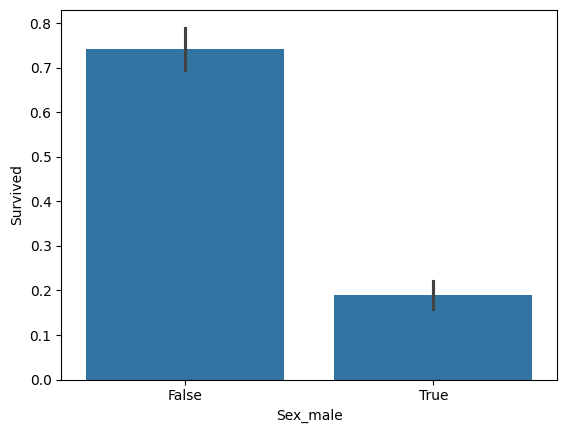

In [ ]:
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.show()

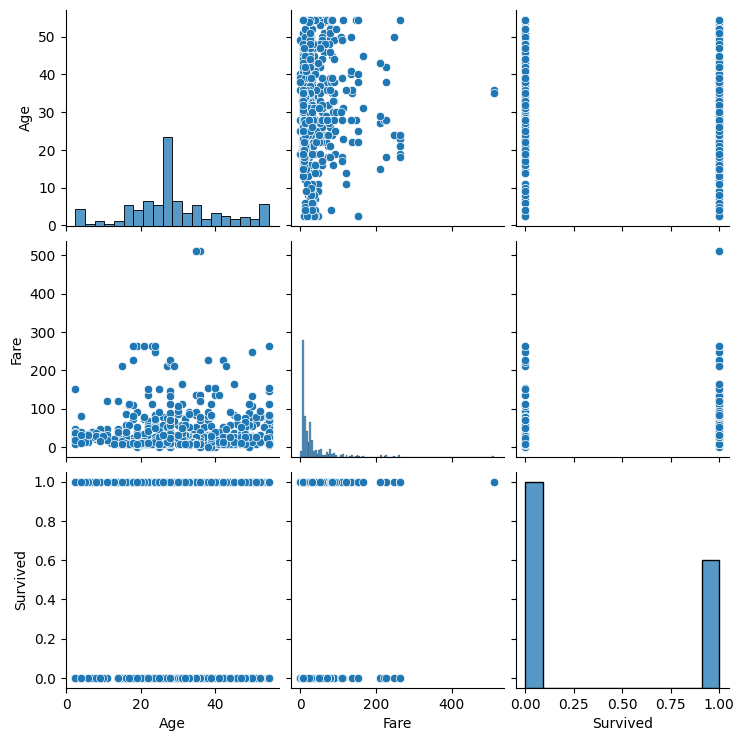

In [ ]:
sns.pairplot(df[['Age', 'Fare', 'Survived']])
plt.show()

## 6.Apply feature scaling technique on suitable attribute.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df[['Age', 'Fare']].head()

,Age,Fare
0,-0.583432,-0.502445
1,0.742685,0.786845
2,-0.251903,-0.488854
3,0.494038,0.420730
4,0.494038,-0.486337


## 7. Split the dataset in the ratio of 80:20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 12) (179, 12) (712,) (179,)
